<br>

<div style="text-align: center;">
<h1><b> Python Data Visualization and Machine Learning Project </b></h1>

<div style="text-align: center;">
<h1><b>Predicting Future Sales

### Objective:
 - You are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set.

### File descriptions
 - sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
 - test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.
 - sample_submission.csv - a sample submission file in the correct format.
 - items.csv - supplemental information about the items/products.
 - item_categories.csv  - supplemental information about the items categories.
 - shops.csv- supplemental information about the shops.

### Data fields
 - ID - an Id that represents a (Shop, Item) tuple within the test set
 - shop_id - unique identifier of a shop
 - item_id - unique identifier of a product
 - item_category_id - unique identifier of item category
 - item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
 - item_price - current price of an item
 - date - date in format dd/mm/yyyy
 - date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
 - item_name - name of item
 - shop_name - name of shop
 - item_category_name - name of item category

---------------------------------------------------------------------------------------------------

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from wordcloud import WordCloud, STOPWORDS

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
pd.options.display.max_columns = None  # for displaying all columns

In [3]:
sns.set_style('darkgrid')

### Reading all datas

In [4]:
train = pd.read_csv('sales_train.csv')
test = pd.read_csv('test.csv')
shops = pd.read_csv('shops.csv')
item_categories = pd.read_csv('item_categories.csv')
items = pd.read_csv('items.csv')

In [5]:
train.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0


In [6]:
test.head(2)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320


In [7]:
shops.head(2)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1


In [8]:
item_categories.head(2)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1


In [9]:
items.head(2)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76


In [10]:
shops.head(10) # here we need to translate shop name from russian to english for our understanding

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


### Translating Russian Language to English using Googletrans

In [11]:
"""

import googletrans
from googletrans import *
translator = googletrans.Translator()

shops['shop_name'] = shops['shop_name'].astype(str)
shops['shop_name_translated'] = shops['shop_name'].apply(translator.translate, src = 'auto', dest = 'en').apply(getattr, args = ('text',))

shops.drop(['shop_name'], axis=1, inplace=True)
shops.rename({'shop_name_translated' : 'shop_name'}, axis =1, inplace = True)
shops.to_csv('shops2.csv')

"""

"\n\nimport googletrans\nfrom googletrans import *\ntranslator = googletrans.Translator()\n\nshops['shop_name'] = shops['shop_name'].astype(str)\nshops['shop_name_translated'] = shops['shop_name'].apply(translator.translate, src = 'auto', dest = 'en').apply(getattr, args = ('text',))\n\nshops.drop(['shop_name'], axis=1, inplace=True)\nshops.rename({'shop_name_translated' : 'shop_name'}, axis =1, inplace = True)\nshops.to_csv('shops2.csv')\n\n"

In [12]:
item_categories # here also we need to translate item_category_name

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [13]:
"""

item_categories['item_category_name'] = item_categories['item_category_name'].astype(str)
item_categories['item_category_name_translated'] = item_categories['item_category_name'].apply(translator.translate, src = 'auto', dest = 'en').apply(getattr, args = ('text',))

item_categories.drop(['item_category_name'], axis=1, inplace=True)
item_categories.rename({'item_category_name_translated' : 'item_category_name'}, axis =1, inplace = True)
item_categories.to_csv('item_categories2.csv')

"""

"\n\nitem_categories['item_category_name'] = item_categories['item_category_name'].astype(str)\nitem_categories['item_category_name_translated'] = item_categories['item_category_name'].apply(translator.translate, src = 'auto', dest = 'en').apply(getattr, args = ('text',))\n\nitem_categories.drop(['item_category_name'], axis=1, inplace=True)\nitem_categories.rename({'item_category_name_translated' : 'item_category_name'}, axis =1, inplace = True)\nitem_categories.to_csv('item_categories2.csv')\n\n"

In [14]:
items # here we need to translate item_name

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [15]:
# items dataframe cannot be translated directly using googletrans as it is a big file and it will show timeout error

# so to prevent timeout error i have splitted the items dataframe into 7 subsets of items

# then after translating i exported all those subsets to csv to save and then loaded them and joined it 

# I have commented all the lines used for translating to prevent it from running again

In [16]:
"""

items_1 = items.iloc[:5000,:]
items_1['item_name'] = items_1['item_name'].astype(str)
items_1['item_name_translated'] = items_1['item_name'].apply(translator.translate, src = 'auto', dest = 'en').apply(getattr, args = ('text',))
items_1.to_csv('item1.csv')

items_2 = items.iloc[5000:10000,:]
items_2['item_name'] = items_2['item_name'].astype(str)
items_2['item_name_translated'] = items_2['item_name'].apply(translator.translate, src = 'auto', dest = 'en').apply(getattr, args = ('text',))
items_2.to_csv('item2.csv')

items_3 = items.iloc[10000:12500,:]
items_3['item_name'] = items_3['item_name'].astype(str)
items_3['item_name_translated'] = items_3['item_name'].apply(translator.translate, src = 'auto', dest = 'en').apply(getattr, args = ('text',))
items_3.to_csv('item3.csv')

items_4 = items.iloc[12500:15000,:]
items_4['item_name'] = items_4['item_name'].astype(str)
items_4['item_name_translated'] = items_4['item_name'].apply(translator.translate, src = 'auto', dest = 'en').apply(getattr, args = ('text',))
items_4.to_csv('item4.csv')

items_5 = items.iloc[15000:17500,:]
items_5['item_name'] = items_5['item_name'].astype(str)
items_5['item_name_translated'] = items_5['item_name'].apply(translator.translate, src = 'auto', dest = 'en').apply(getattr, args = ('text',))
items_5.to_csv('item5.csv')

items_6 = items.iloc[17500:20000,:]
items_6['item_name'] = items_6['item_name'].astype(str)
items_6['item_name_translated'] = items_6['item_name'].apply(translator.translate, src = 'auto', dest = 'en').apply(getattr, args = ('text',))
items_6.to_csv('item6.csv')

items_7 = items.iloc[20000:22170,:]
items_7['item_name'] = items_7['item_name'].astype(str)
items_7['item_name_translated'] = items_7['item_name'].apply(translator.translate, src = 'auto', dest = 'en').apply(getattr, args = ('text',))
items_7.to_csv('item7.csv')

"""

"\n\nitems_1 = items.iloc[:5000,:]\nitems_1['item_name'] = items_1['item_name'].astype(str)\nitems_1['item_name_translated'] = items_1['item_name'].apply(translator.translate, src = 'auto', dest = 'en').apply(getattr, args = ('text',))\nitems_1.to_csv('item1.csv')\n\nitems_2 = items.iloc[5000:10000,:]\nitems_2['item_name'] = items_2['item_name'].astype(str)\nitems_2['item_name_translated'] = items_2['item_name'].apply(translator.translate, src = 'auto', dest = 'en').apply(getattr, args = ('text',))\nitems_2.to_csv('item2.csv')\n\nitems_3 = items.iloc[10000:12500,:]\nitems_3['item_name'] = items_3['item_name'].astype(str)\nitems_3['item_name_translated'] = items_3['item_name'].apply(translator.translate, src = 'auto', dest = 'en').apply(getattr, args = ('text',))\nitems_3.to_csv('item3.csv')\n\nitems_4 = items.iloc[12500:15000,:]\nitems_4['item_name'] = items_4['item_name'].astype(str)\nitems_4['item_name_translated'] = items_4['item_name'].apply(translator.translate, src = 'auto', dest

## Reading all translated csv files

In [17]:
shops = pd.read_csv('shops2.csv', index_col = 0)
item_categories = pd.read_csv('item_categories2.csv', index_col = 0)

item_1 = pd.read_csv('item1.csv', index_col = 0)
item_2 = pd.read_csv('item2.csv', index_col = 0)
item_3 = pd.read_csv('item3.csv', index_col = 0)
item_4 = pd.read_csv('item4.csv', index_col = 0)
item_5 = pd.read_csv('item5.csv', index_col = 0)
item_6 = pd.read_csv('item6.csv', index_col = 0)
item_7 = pd.read_csv('item7.csv', index_col = 0)

items = item_1.append([item_2, item_3, item_4, item_5, item_6, item_7])

In [18]:
shops.head()

,shop_id,shop_name
0,0,"!Yakutsk Ordzhonikidze, 56 francs"
1,1,"!Yakutsk shopping center ""Central"" franc"
2,2,"Adygea shopping center ""Mega"""
3,3,"Balashikha SEC ""October-Kinomir"""
4,4,"Volzhsky shopping center ""Volga Mall"""


In [19]:
item_categories.head()

,item_category_id,item_category_name
0,0,PC - Headsets/Headphones
1,1,Accessories - PS2
2,2,Accessories - PS3
3,3,Accessories - PS4
4,4,Accessories - PSP


In [20]:
items.head()

,item_name,item_id,item_category_id,item_name_translated
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,! IN THE POWER OF GLAMOR (PLAST.) D
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,!ABBYY FineReader 12 Professional Edition Full...
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,*** IN THE RAYS OF GLORY (UNV) D
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,***BLUE WAVE (Univ) D
4,***КОРОБКА (СТЕКЛО) D,4,40,***BOX (GLASS) D


In [21]:
items.drop(['item_name'], axis=1, inplace=True)
items.rename({'item_name_translated' : 'item_name'}, axis =1, inplace = True)
items.head()

,item_id,item_category_id,item_name
0,0,40,! IN THE POWER OF GLAMOR (PLAST.) D
1,1,76,!ABBYY FineReader 12 Professional Edition Full...
2,2,40,*** IN THE RAYS OF GLORY (UNV) D
3,3,40,***BLUE WAVE (Univ) D
4,4,40,***BOX (GLASS) D


### Creating a copy of all dataframes for Machine Learning

In [22]:
train_copy = train.copy()
test_copy = test.copy()
shops_copy = shops.copy()
item_categories_copy = item_categories.copy()
items_copy = items.copy()

## Merging Dataframes

In [23]:
train.shape, test.shape, shops.shape, item_categories.shape, items.shape

((2935849, 6), (214200, 3), (60, 2), (84, 2), (22170, 3))

In [24]:
# merging item_categories with items

items = pd.merge(items, item_categories, on = 'item_category_id')

In [25]:
#merging shops with train and test

train = pd.merge(train, shops, on = 'shop_id')

test = pd.merge(test, shops, on = 'shop_id')

In [26]:
#merging items with train and test

train = pd.merge(train, items, on = 'item_id')

test = pd.merge(test, items, on = 'item_id')

In [27]:
train.shape, test.shape, shops.shape, item_categories.shape, items.shape

((2935849, 10), (214200, 7), (60, 2), (84, 2), (22170, 4))

In [28]:
df = train

In [29]:
df.duplicated().sum()

6

In [30]:
df.drop_duplicates(inplace = True)

In [31]:
df['date'] = pd.to_datetime(df['date'])

In [32]:
df.set_index('date', inplace=True)

In [33]:
df['item_cnt_day'] = df['item_cnt_day'].abs()

In [34]:
df.dtypes

date_block_num          int64
shop_id                 int64
item_id                 int64
item_price            float64
item_cnt_day          float64
shop_name              object
item_category_id        int64
item_name              object
item_category_name     object
dtype: object

In [35]:
df.isnull().sum()

date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
shop_name             0
item_category_id      0
item_name             0
item_category_name    0
dtype: int64

In [36]:
df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,2.935843e+06,2.935843e+06,2.935843e+06,2.935843e+06,2.935843e+06,2.935843e+06
mean,1.456991e+01,3.300171e+01,1.019723e+04,8.908535e+02,1.247779e+00,4.000141e+01
std,9.422992e+00,1.622698e+01,6.324293e+03,1.729801e+03,2.616393e+00,1.710076e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,1.000000e+00,0.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.800000e+01
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.000000e+01
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,5.500000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,8.300000e+01


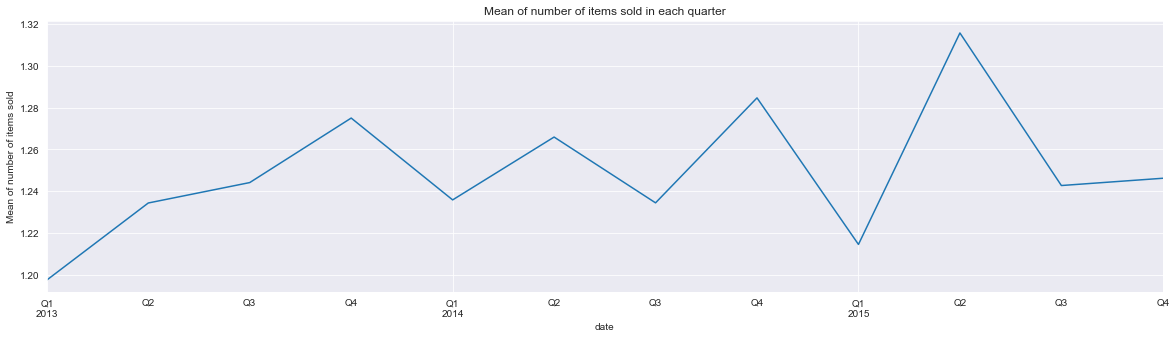

In [37]:
fig, ax = plt.subplots(figsize=(20,5)) 
df.item_cnt_day.resample('Q').mean().plot()
plt.ylabel('Mean of number of items sold')
plt.title('Mean of number of items sold in each quarter')
plt.show()

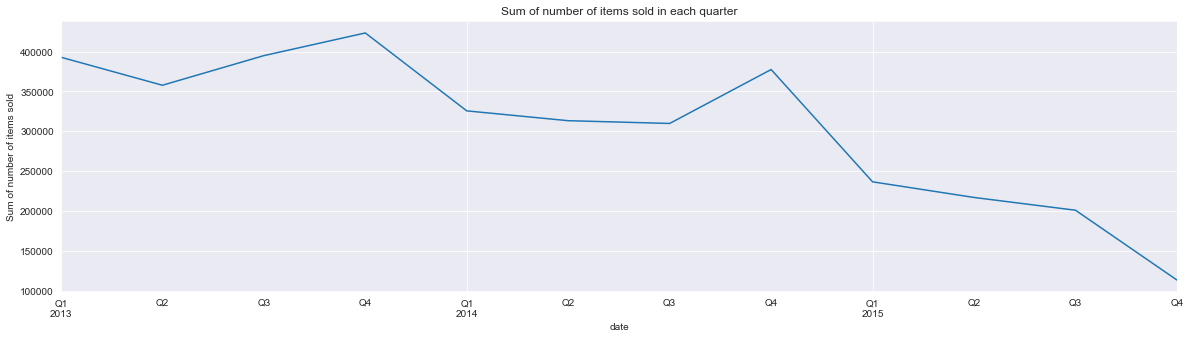

In [38]:
fig, ax = plt.subplots(figsize=(20,5)) 
df.item_cnt_day.resample('Q').sum().plot()
plt.ylabel('Sum of number of items sold')
plt.title('Sum of number of items sold in each quarter')
plt.show()

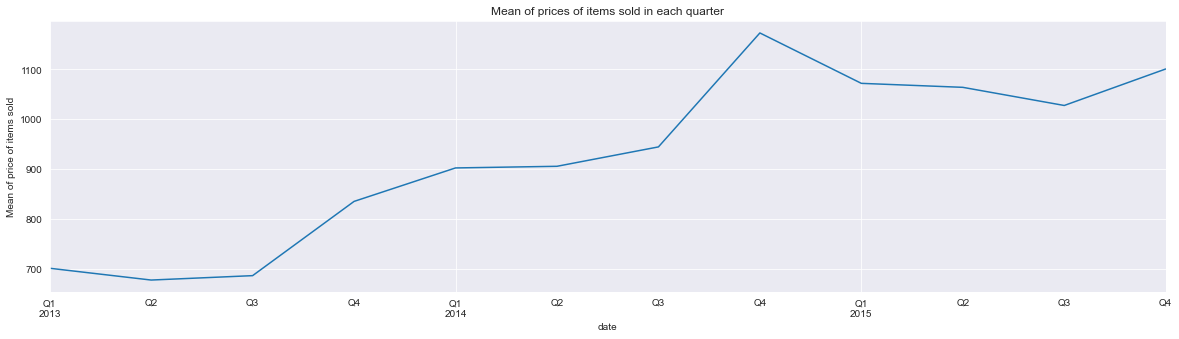

In [39]:
fig, ax = plt.subplots(figsize=(20,5)) 
df.item_price.resample('Q').mean().plot()
plt.ylabel('Mean of price of items sold')
plt.title('Mean of prices of items sold in each quarter')
plt.show()

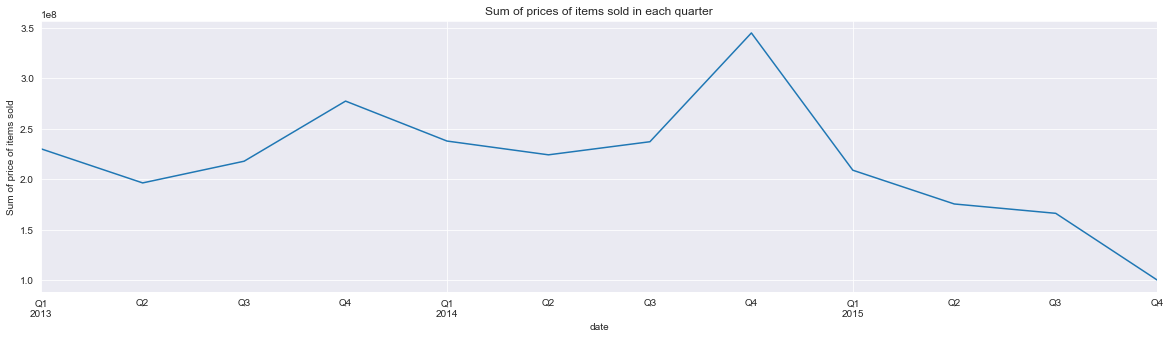

In [40]:
fig, ax = plt.subplots(figsize=(20,5)) 
df.item_price.resample('Q').sum().plot()
plt.ylabel('Sum of price of items sold')
plt.title('Sum of prices of items sold in each quarter')
plt.show()

## Shop Wise Data of Sales

In [41]:
shop_wise = df.groupby(['shop_name']).agg({'item_cnt_day': 'sum', 'item_price': 'sum'})
shop_wise.reset_index(inplace = True)
shop_wise.head(10)

,shop_name,item_cnt_day,item_price
0,"!Yakutsk Ordzhonikidze, 56 francs",11705.0,5.553869e+06
1,"!Yakutsk shopping center ""Central"" franc",6311.0,2.926161e+06
2,"Adygea shopping center ""Mega""",30792.0,3.510444e+07
3,"Balashikha SEC ""October-Kinomir""",28595.0,2.647262e+07
4,"Chekhov SEC ""Carnival""",78473.0,5.169638e+07
5,Digital warehouse 1C-Online,63392.0,2.113586e+07
6,E-shop online,74502.0,5.080559e+07
7,"Kaluga SEC ""XXI century""",71461.0,5.559759e+07
8,"Kazan ""Behetle"" shopping center",19763.0,5.333601e+06
9,"Kazan shopping center ""Parkhouse"" II",46653.0,3.600645e+07


### Now lets check which shops has sold highest and lowest number of items

In [42]:
shop_wise_count = shop_wise.sort_values(['item_cnt_day'], ascending=False)
shop_wise_highest_count_10 = shop_wise_count.head(10)
shop_wise_lowest_count_10 = shop_wise_count.tail(10)

In [43]:
shop_wise_highest_count_10 # these are the top 10 shops which sold highest number of items

,shop_name,item_cnt_day,item_price
26,"Moscow shopping center ""Semenovsky""",311683.0,1.707634e+08
21,"Moscow TRK ""Atrium""",242553.0,1.555566e+08
10,"Khimki TC ""Mega""",186507.0,1.096693e+08
24,"Moscow shopping center ""MEGA Teply Stan"" II",184997.0,1.252947e+08
42,"St. Petersburg TC ""Nevsky Center""",145455.0,1.015510e+08
55,"Yakutsk Ordzhonikidze, 56",141741.0,9.131521e+07
23,"Moscow shopping center ""MEGA Belaya Dacha II""",136973.0,1.056489e+08
52,"Voronezh (Plekhanovskaya, 13)",101025.0,7.455831e+07
56,"Yakutsk shopping center ""Central""",82082.0,5.846344e+07
41,"Sergiev Posad Shopping Center ""7Ya""",79194.0,6.093469e+07


In [44]:
shop_wise_lowest_count_10 # these are the top 10 shops which sold lowest number of items

,shop_name,item_cnt_day,item_price
27,"Moscow shopping center ""Silver House""",8849.0,5.098652e+06
19,"Moscow TC ""Budenovsky"" (pavilion A2)",7739.0,5.023142e+06
30,"N.Novgorod SEC ""RIO""",6501.0,7.695497e+06
1,"!Yakutsk shopping center ""Central"" franc",6311.0,2.926161e+06
15,"Moscow ""Sale""",5874.0,2.389266e+06
28,"Mytishchi SEC ""XL-3""",5526.0,5.594080e+06
36,"Rostov-on-Don SEC ""Megacenter Horizont"" Ostrovnoy",4969.0,4.080156e+06
54,"Voronezh TRC City-Park ""City""",3609.0,2.226273e+06
59,Zhukovsky st. Chkalova 39m²,572.0,4.798425e+05
31,"Novosibirsk SEC ""Novosibirsk Gallery""",336.0,3.568190e+05


### Now lets plot the above two dataframes

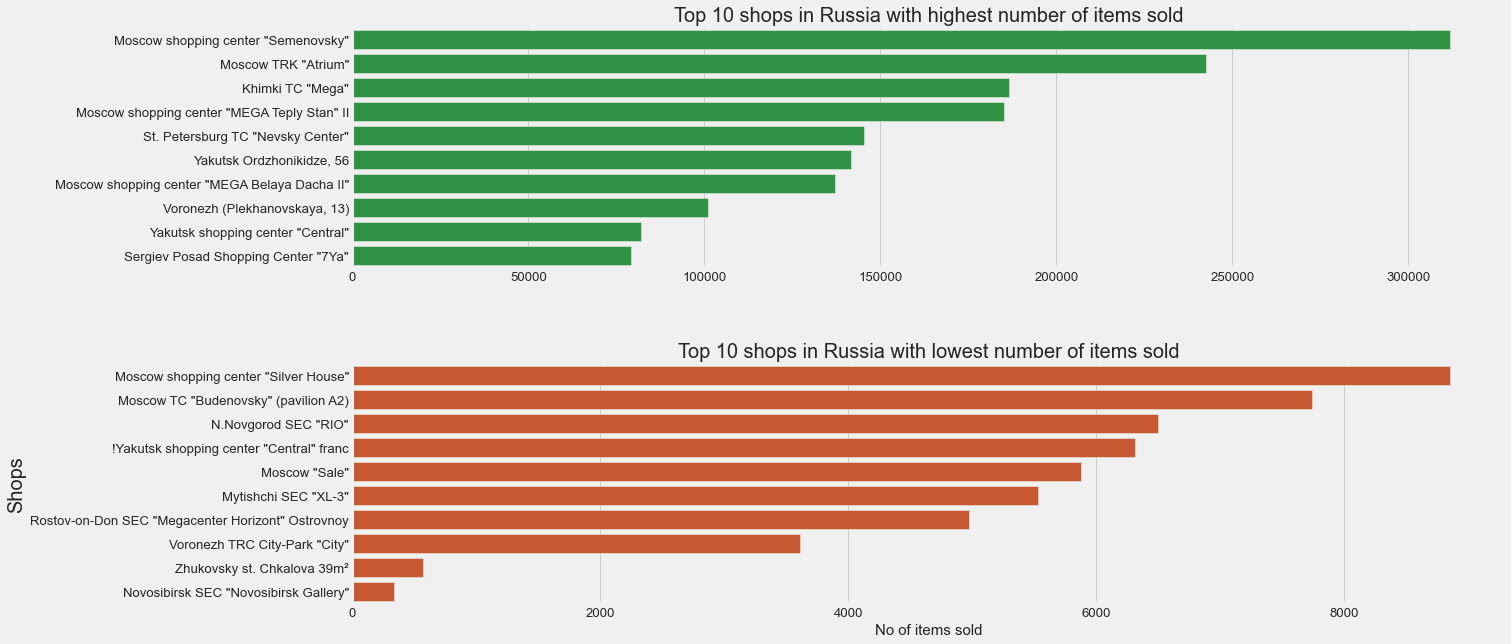

In [97]:
plt.style.use('fivethirtyeight')

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20,10))

sns.barplot( x = 'item_cnt_day', y = 'shop_name', data = shop_wise_highest_count_10, color='#20A239', ax=ax1)
sns.barplot( x = 'item_cnt_day', y = 'shop_name', data = shop_wise_lowest_count_10, color='#DF4C19', ax=ax2)

ax1.set_title('Top 10 shops in Russia with highest number of items sold', fontsize=20)
ax1.set_xlabel("", fontsize=15)
ax1.set_ylabel("", fontsize=20)

ax2.set_title('Top 10 shops in Russia with lowest number of items sold', fontsize=20)
ax2.set_xlabel("No of items sold", fontsize=15)
ax2.set_ylabel("Shops", fontsize=20)

sns.set(font_scale= 1.2)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

## Sold Items Data

In [46]:
item_wise = df.groupby(['item_name']).agg({'item_cnt_day': 'sum', 'item_price': 'sum'})
item_wise.reset_index(inplace = True)
item_wise.head(10)

,item_name,item_cnt_day,item_price
0,! IN THE POWER OF GLAMOR (PLAST.) D,1.0,58.0
1,!ABBYY FineReader 12 Professional Edition Full...,6.0,26940.0
2,"""EyePet (Essentials) [PSP, Russian version]"" +...",1.0,1499.0
3,* DEATH LINE D,1.0,58.0
4,*** IN THE RAYS OF GLORY (UNV) D,2.0,116.0
5,***BLUE WAVE (Univ) D,2.0,158.0
6,***BOX (GLASS) D,1.0,58.0
7,***GOAL SHOT (UNI) D,1.0,100.0
8,***GOAL SHOT-2 (UNI) D,1.0,28.0
9,***NEW AMERICAN GRAFFITI (UNI) D,1.0,28.0


### Now lets check which items are sold most

In [47]:
item_wise_count = item_wise.sort_values(['item_cnt_day'], ascending=False)
item_wise_highest_count_10 = item_wise_count.head(10)
item_wise_lowest_count_10 = item_wise_count.tail(10)

In [48]:
item_wise_highest_count_10 # these are the top 10 items which sold most in shops

,item_name,item_cnt_day,item_price
5203,Corporate package T-shirt 1C Interest white (3...,187678.0,1.540316e+05
6086,"Diablo III [PC, Jewel, Russian version]",17265.0,7.475887e+06
8201,"Grand Theft Auto V [PS3, Russian subtitles]",16710.0,1.756505e+07
1806,Acceptance of funds for 1C-Online,15830.0,9.924972e+06
14198,Playstation Store replenishment of the wallet:...,14529.0,9.984311e+06
8203,Grand Theft Auto V [Xbox 360 Russian subtitles],11778.0,1.589006e+07
17259,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,10341.0,1.132643e+08
8200,"Grand Theft Auto V [PC, Russian subtitles]",10111.0,4.829843e+06
3426,"Battlefield 4 [PC, Russian version]",10050.0,5.239126e+06
13217,One of Us [PS3 Russian Version],9283.0,1.203159e+07


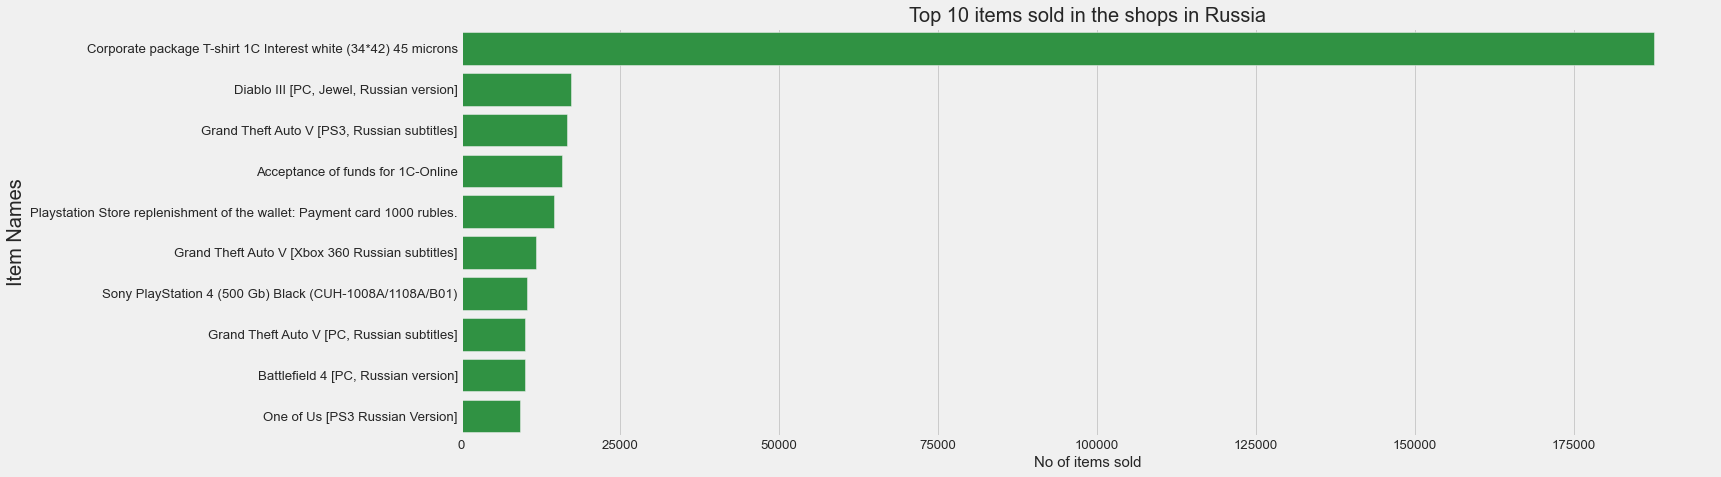

In [99]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(20,7))

sns.barplot( x = 'item_cnt_day', y = 'item_name', data = item_wise_highest_count_10, color='#20A239', ax=ax)

ax.set_title('Top 10 items sold in the shops in Russia', fontsize=20)

ax.set_xlabel("No of items sold", fontsize=15)

ax.set_ylabel("Item Names", fontsize=20)

sns.set(font_scale= 1.2)

## Item Category Data

In [50]:
item_category_wise = df.groupby(['item_category_name']).agg({'item_cnt_day': 'sum', 'item_price': 'sum'})
item_category_wise.reset_index(inplace = True)
item_category_wise.head(10)

,item_category_name,item_cnt_day,item_price
0,Accessories - PS2,2.0,4.310000e+02
1,Accessories - PS3,19795.0,4.175334e+07
2,Accessories - PS4,30059.0,5.323800e+07
3,Accessories - PSP,2433.0,1.278020e+06
4,Accessories - PSVita,7467.0,6.257036e+06
5,Accessories - XBOX 360,20654.0,3.501494e+07
6,Accessories - XBOX ONE,5422.0,1.209973e+07
7,Android Games - Number,114.0,1.482460e+04
8,Batteries,12062.0,7.226243e+05
9,Blank media (piece),10437.0,1.425916e+05


### Now lets also check which item categories have sold most

In [51]:
item_category_wise_count = item_category_wise.sort_values(['item_cnt_day'], ascending=False)
item_category_wise_highest_count_10 = item_category_wise_count.head(10)
item_category_wise_lowest_count_10 = item_category_wise_count.tail(10)

In [52]:
item_category_wise_highest_count_10  # these are the top 10 item categories which sold most in shops

,item_category_name,item_cnt_day,item_price
26,Cinema - DVD,635598.0,1.447423e+08
67,PC Games - Standard Editions,458178.0,1.755141e+08
62,Music - locally produced CD,349509.0,9.719241e+07
38,Games - PS3,256627.0,3.148364e+08
56,Movie - Blu-Ray,204777.0,8.367583e+07
43,"Gifts - Bags, Albums, Mouse pads",188034.0,1.548303e+05
66,PC Games - Extra Editions,175500.0,8.590357e+07
42,Games - XBOX 360,171206.0,2.171401e+08
39,Games - PS4,128207.0,2.207125e+08
45,Gifts - Board games (compact),73129.0,1.914264e+07


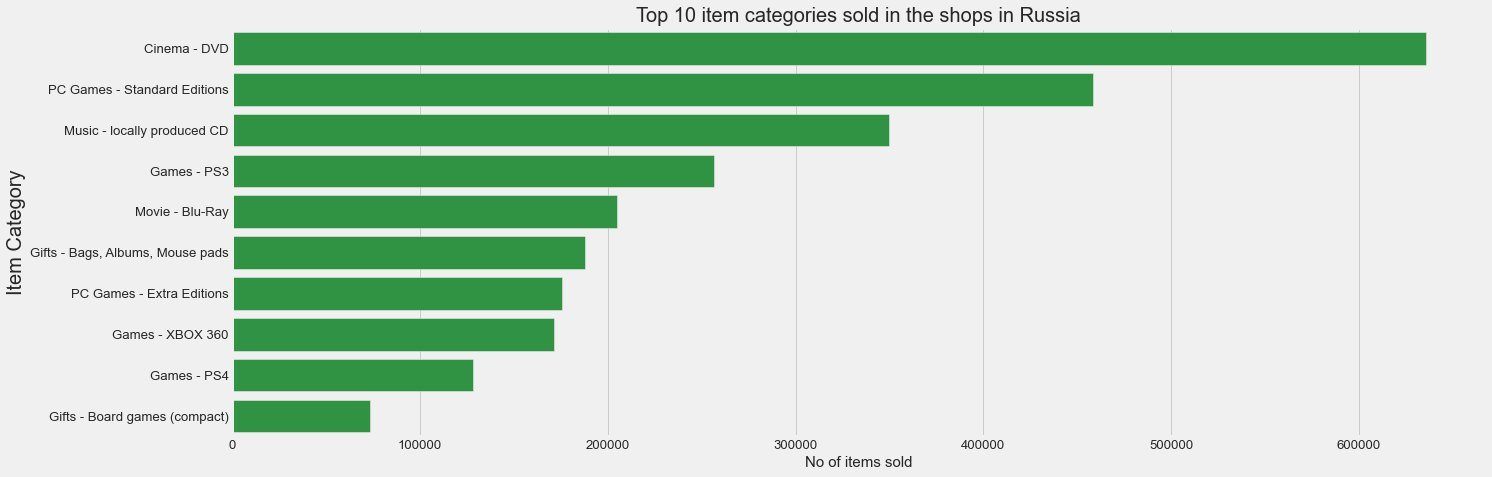

In [95]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(20,7))

sns.barplot( x = 'item_cnt_day', y = 'item_category_name', data = item_category_wise_highest_count_10, color='#20A239', ax=ax)

ax.set_title('Top 10 item categories sold in the shops in Russia', fontsize=20)

ax.set_xlabel("No of items sold", fontsize=15)

ax.set_ylabel("Item Category", fontsize=20)

sns.set(font_scale= 1.2)

In [54]:
df.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_category_id,item_name,item_category_name
date,,,,,,,,,
2013-02-01,0,59,22154,999.0,1.0,"Yaroslavl shopping center ""Altair""",37,PHENOMENON 2012 (BD),Movie - Blu-Ray
2013-02-01,0,25,22154,999.0,1.0,"Moscow TRK ""Atrium""",37,PHENOMENON 2012 (BD),Movie - Blu-Ray
2013-03-01,0,25,22154,999.0,1.0,"Moscow TRK ""Atrium""",37,PHENOMENON 2012 (BD),Movie - Blu-Ray
2013-01-20,0,25,22154,999.0,1.0,"Moscow TRK ""Atrium""",37,PHENOMENON 2012 (BD),Movie - Blu-Ray
2013-01-23,0,25,22154,999.0,1.0,"Moscow TRK ""Atrium""",37,PHENOMENON 2012 (BD),Movie - Blu-Ray


#### Now lets check relationship and correlation of item_cnt_day with other features in the dataframe using scatter plot

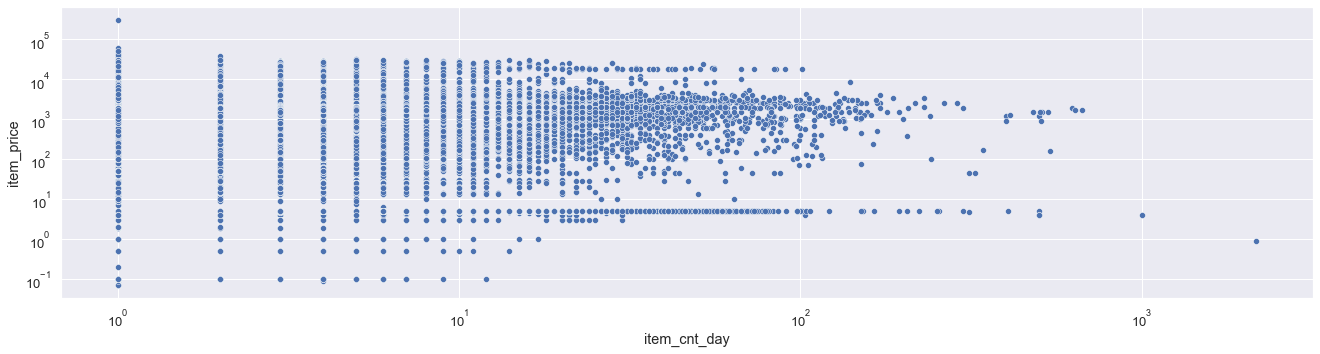

In [100]:
# checking relationship between price and number of items sold
fig, ax = plt.subplots(figsize=(20,5)) 
sns.scatterplot(data=df, x='item_cnt_day', y='item_price')
plt.xscale('log')
plt.yscale('log')
plt.show()

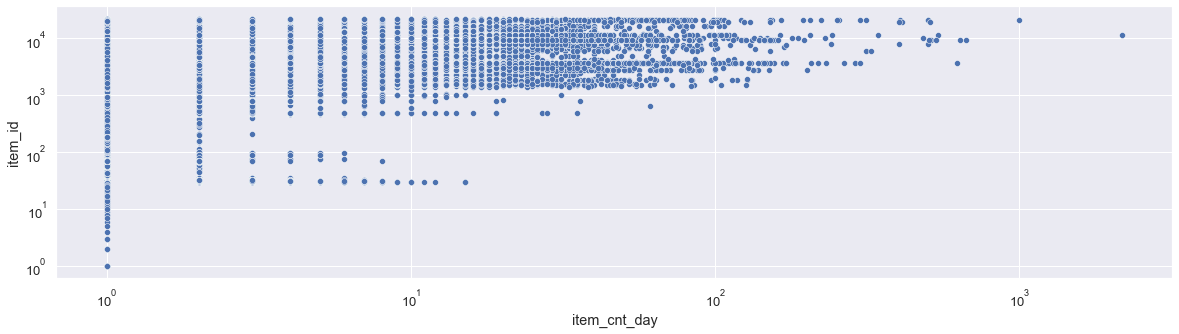

In [56]:
# checking relationship between item id and number of items sold
fig, ax = plt.subplots(figsize=(20,5))          
sns.scatterplot(data=df, x='item_cnt_day', y='item_id')
plt.xscale('log')
plt.yscale('log')
plt.show()

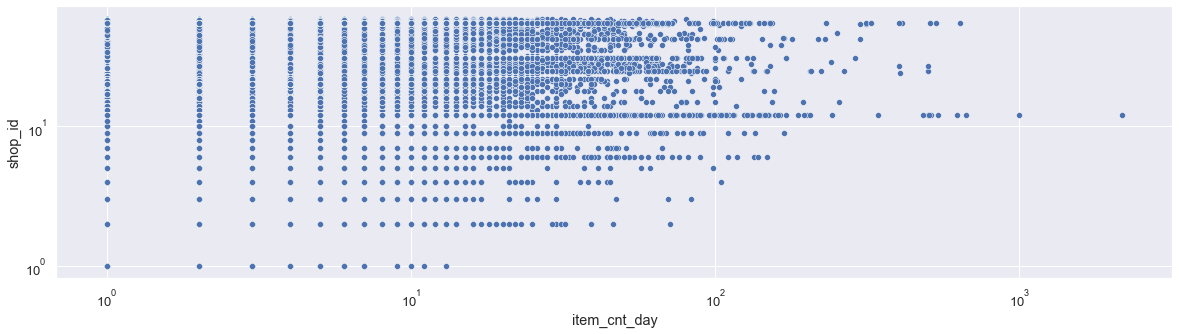

In [57]:
# checking relationship between shop id and number of items sold
fig, ax = plt.subplots(figsize=(20,5))         
sns.scatterplot(data=df, x='item_cnt_day', y='shop_id')
plt.xscale('log')
plt.yscale('log')
plt.show()

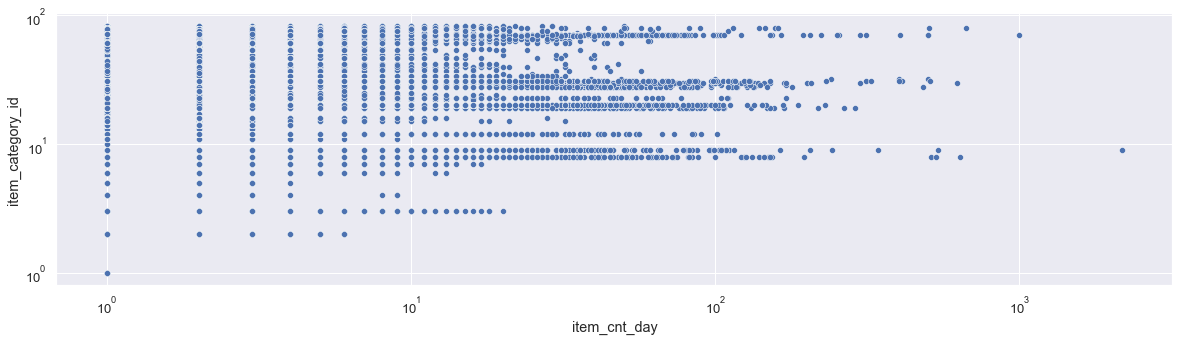

In [58]:
# checking relationship between item category and number of items sold
fig, ax = plt.subplots(figsize=(20,5))                           
sns.scatterplot(data=df, x='item_cnt_day', y='item_category_id')
plt.xscale('log')
plt.yscale('log')
plt.show() 

------------------------------------------------------------------------------------------------------------------------------------------------------------

<span style="color: #F4350B; font-family:  'Brush Script MT', cursive;; font-size: 5em;">Word</span>
<span style="color: #4D5656; font-family:  'Brush Script MT', cursive;; font-size: 5em;">Cloud</span>

In [60]:
df.head(3)

,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_category_id,item_name,item_category_name
date,,,,,,,,,
2013-02-01,0,59,22154,999.0,1.0,"Yaroslavl shopping center ""Altair""",37,PHENOMENON 2012 (BD),Movie - Blu-Ray
2013-02-01,0,25,22154,999.0,1.0,"Moscow TRK ""Atrium""",37,PHENOMENON 2012 (BD),Movie - Blu-Ray
2013-03-01,0,25,22154,999.0,1.0,"Moscow TRK ""Atrium""",37,PHENOMENON 2012 (BD),Movie - Blu-Ray


### Shop Names

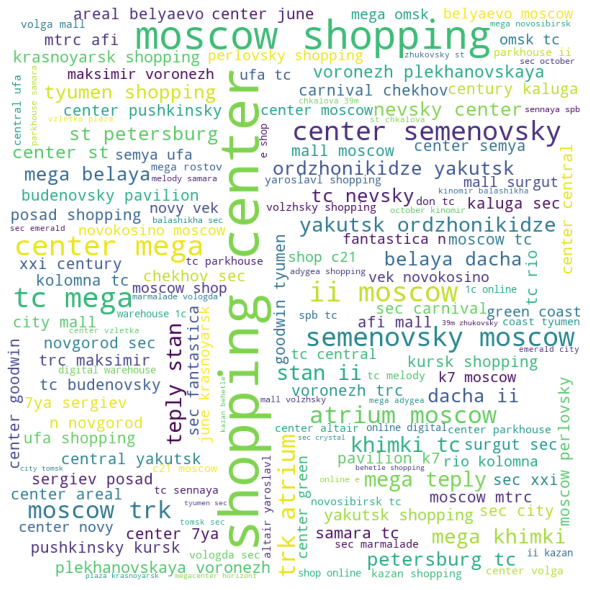

In [61]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.shop_name:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8,8), facecolor = 'white')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Item Category Names

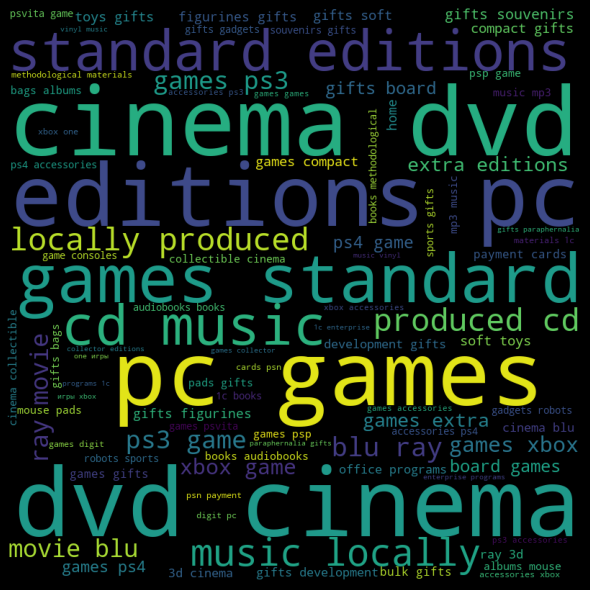

In [62]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.item_category_name:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8,8), facecolor = 'black')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------

<h1><b><i>Machine Learning

<h4><i>Checking Supervised or Unsupervised - It is a supervised training set.

<h4><i>Checking Classification model or Regression Model - It is a regression model.

<h4><i> Now lets preprocess the datasets for training the model

In [63]:
train_copy

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [64]:
train_copy.shape, test_copy.shape, shops_copy.shape, item_categories_copy.shape, items_copy.shape

((2935849, 6), (214200, 3), (60, 2), (84, 2), (22170, 3))

In [65]:
train_copy['date'] = pd.to_datetime(train_copy['date'], format = '%d.%m.%Y')  # converting date to datetime

In [66]:
dataset = train_copy.pivot_table(index = ['shop_id', 'item_id'], values =['item_cnt_day'], columns = ['date_block_num'], fill_value = 0, aggfunc = 'sum')
dataset.reset_index(inplace = True)
dataset

shop_id item_id item_cnt_day                                    \
date_block_num                            0   1  2  3  4  5  6  7  8  9 10 11   
0                    0      30            0  31  0  0  0  0  0  0  0  0  0  0   
1                    0      31            0  11  0  0  0  0  0  0  0  0  0  0   
2                    0      32            6  10  0  0  0  0  0  0  0  0  0  0   
3                    0      33            3   3  0  0  0  0  0  0  0  0  0  0   
4                    0      35            1  14  0  0  0  0  0  0  0  0  0  0   
...                ...     ...          ...  .. .. .. .. .. .. .. .. .. .. ..   
424119              59   22154            1   0  0  0  0  0  0  0  0  0  0  0   
424120              59   22155            0   0  0  0  0  0  1  0  0  0  0  0   
424121              59   22162            0   0  0  0  0  0  0  0  0  0  0  0   
424122              59   22164            0   0  0  0  0  0  0  0  0  0  0  0   
424123              59   22167            0   0  0  0  0  0  0  0  0  1  0  2   

                                                                               \
date_block_num 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32   
0               0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
1               0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
2               0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
3               0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
4               0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
...            .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. ..   
424119          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
424120          0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
424121          0  0  0  0  0  0  0  0  0  0  0  0  0  9  4  1  1  0  0  1  0   
424122          0  0  0  0  0  0  0  0  0  0  0  0  0  2  1  2  0  0  1  0  0   
424123          0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   

                   
date_block_num 33  
0               0  
1               0  
2               0  
3               0  
4               0  
...            ..  
424119          0  
424120          0  
424121          0  
424122          0  
424123          0  

[424124 rows x 36 columns]

In [67]:
ID = test_copy.ID  # taking a copy of ID before dropping it test dataset for the submission of the result
ID

0              0
1              1
2              2
3              3
4              4
           ...  
214195    214195
214196    214196
214197    214197
214198    214198
214199    214199
Name: ID, Length: 214200, dtype: int64

In [68]:
test_copy = test_copy.drop(['ID'], axis = 1)

In [69]:
test_copy

,shop_id,item_id
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268
...,...,...
214195,45,18454
214196,45,16188
214197,45,15757
214198,45,19648


In [70]:
dataset = pd.merge(test_copy, dataset, on = ['item_id', 'shop_id'], how = 'left')
dataset

,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)","(item_cnt_day, 10)","(item_cnt_day, 11)","(item_cnt_day, 12)","(item_cnt_day, 13)","(item_cnt_day, 14)","(item_cnt_day, 15)","(item_cnt_day, 16)","(item_cnt_day, 17)","(item_cnt_day, 18)","(item_cnt_day, 19)","(item_cnt_day, 20)","(item_cnt_day, 21)","(item_cnt_day, 22)","(item_cnt_day, 23)","(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,5,5320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,5268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,45,18454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
214196,45,16188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214197,45,15757,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214198,45,19648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
dataset.columns = ['shop_id','item_id',1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]

In [72]:
dataset

,shop_id,item_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,5,5320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,5268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,45,18454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
214196,45,16188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214197,45,15757,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214198,45,19648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
dataset.isnull().sum().sum() # checking for null cells

3495064

In [74]:
dataset.fillna(0, inplace=True) # filling all null cells with 0
dataset.isnull().sum().sum()

0

In [75]:
dataset.drop(['shop_id', 'item_id'], inplace = True, axis = 1)
dataset

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
214196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214197,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214200 entries, 0 to 214199
Data columns (total 34 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   1       214200 non-null  float64
 1   2       214200 non-null  float64
 2   3       214200 non-null  float64
 3   4       214200 non-null  float64
 4   5       214200 non-null  float64
 5   6       214200 non-null  float64
 6   7       214200 non-null  float64
 7   8       214200 non-null  float64
 8   9       214200 non-null  float64
 9   10      214200 non-null  float64
 10  11      214200 non-null  float64
 11  12      214200 non-null  float64
 12  13      214200 non-null  float64
 13  14      214200 non-null  float64
 14  15      214200 non-null  float64
 15  16      214200 non-null  float64
 16  17      214200 non-null  float64
 17  18      214200 non-null  float64
 18  19      214200 non-null  float64
 19  20      214200 non-null  float64
 20  21      214200 non-null  float64
 21  22      21

In [77]:
x = dataset.drop([34], axis=1)

In [78]:
x

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
214196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214197,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
y = dataset[34]

In [80]:
y

0         0.0
1         0.0
2         1.0
3         0.0
4         0.0
         ... 
214195    1.0
214196    0.0
214197    0.0
214198    0.0
214199    0.0
Name: 34, Length: 214200, dtype: float64

In [81]:
test = dataset.drop([1], axis=1)

<h2><i> Random Forest Regressor

In [82]:
model = AdaBoostRegressor(base_estimator= RandomForestRegressor(max_depth=5),
random_state=0, n_estimators=2000).fit(x,y)

In [83]:
y_pred = model.predict(x)
y_pred

array([0.42264726, 0.19801706, 1.65812525, ..., 0.19801706, 0.19801706,
       0.19801706])

In [84]:
model.score(x,y)

0.9429033281380743

<h2><i> Decision Tree Regressor

In [86]:
model2 = AdaBoostRegressor(base_estimator= DecisionTreeRegressor(max_depth=5),
random_state=0, n_estimators=2000).fit(x,y)

In [87]:
y_pred = model2.predict(x)
y_pred

array([0.38658125, 0.89121146, 1.59161662, ..., 0.89121146, 0.89121146,
       0.89121146])

In [88]:
model2.score(x,y)

0.9310640376153307

<h2><i> Extra Trees Regressor

In [90]:
model3 = AdaBoostRegressor(base_estimator= ExtraTreesRegressor(max_depth=5),
random_state=0, n_estimators=2000).fit(x,y)

In [91]:
y_pred = model3.predict(x)
y_pred

array([0.51518136, 0.45200367, 0.60895494, ..., 0.45200367, 0.45200367,
       0.45200367])

In [92]:
model3.score(x,y)

0.9415498131733347

<h3><i> Now lets predict the test dataset with the most suitable model

In [93]:
pred = model.predict(test)
pred

array([0.19801706, 0.19801706, 0.42264726, ..., 0.19801706, 0.19801706,
       0.19801706])

<h3><i> File Submission

In [94]:
submission_file = pred

submission_file = submission_file.clip(0,20)

submission_trp = pd.DataFrame({
    'ID': ID, 'item_cnt_month' : submission_file.ravel()
})

submission_trp.to_csv('submission.csv', index = False)

submission_trp.head(20)

,ID,item_cnt_month
0,0,0.198017
1,1,0.198017
2,2,0.422647
3,3,0.198017
4,4,0.198017
5,5,0.198017
6,6,1.252209
7,7,0.198017
8,8,0.422647
9,9,0.198017


------------------------------------------------------------------------------------------------------------------------------------------------------------

## Conclusion

| Model                     | Accuracy    | Runtime     |  
| ------------------------- | ----------- | ----------- |
| RandomForestRegressor     | 94.29 %     | 3 min         |
| DecisionTreeRegressor     | 93.10 %     |    5 sec         |
| ExtraTreesRegressor       | 94.15 %     |    5 min         |

- When we consider accuracy <b>RandomForestRegressor</b> is more suitable.
- And if we consider speed then <b>DecisionTreeRegressor</b> is the more suitable.

And in this case as runtime is not very high with <b>RandomForestRegressor</b> so i used it as my final model for prediction.

<br>
<br>
<br>
<div style="text-align: center;">
    <span style="color: #78281F; font-family:  'Brush Script MT', cursive;; font-size: 5em;">T</span>
    <span style="color: #943126; font-family:  'Brush Script MT', cursive;; font-size: 5em;">h</span>
    <span style="color: #B03A2E; font-family:  'Brush Script MT', cursive;; font-size: 5em;">a</span>
    <span style="color: #CB4335; font-family:  'Brush Script MT', cursive;; font-size: 5em;">n</span>
    <span style="color: #E74C3C; font-family:  'Brush Script MT', cursive;; font-size: 5em;">k</span>
    <span style="color: #EC7063; font-family:  'Brush Script MT', cursive;; font-size: 5em;">Y</span>
    <span style="color: #F1948A; font-family:  'Brush Script MT', cursive;; font-size: 5em;">o</span>
    <span style="color: #F5B7B1; font-family:  'Brush Script MT', cursive;; font-size: 5em;">u</span>
</div>
<br>
<br>
<br>
